In [58]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 

warnings.filterwarnings('ignore') 

In [59]:
df = pd.read_csv(r'C:\Users\shivd\Downloads\mymoviedb.csv',lineterminator='\n')

In [60]:
df.head(3)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [62]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [63]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [64]:
df.duplicated().sum()

np.int64(0)

* we have a dataframe consisting of 9827 rows and 9 columns.
 * our dataset looks a bit tidy with no NaNs nor duplicated values.
 * Release_Date column needs to be casted into date time and to extract only the year value.
 * Overview, Original_Language and Poster_Url wouldn't be so useful during analysis, so we'll drop them.
 * there is noticable outliers in Popularity column
 * Vote_Average bettter be categorised for proper analysis.
 * Genre column has comma saperated values and white spaces that needs to be handled and casted into category.

In [65]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [66]:
df['Release_Date'] = df['Release_Date'].dt.year
print(df['Release_Date'].dtypes)

int32


In [67]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [68]:
col = ['Overview','Original_Language','Poster_Url']

In [69]:
df.drop(col,axis=1,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [70]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


# categorizing Vote_Average column
    We would cut the Vote_Average values and make 4 categories: popular average
    below_avg not_popular to describe it more using catigorize_col() function
    provided above.

In [71]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
df['Vote_Average'] = pd.qcut(df['Vote_Average'], q=4, labels=labels, duplicates='drop')
 

In [72]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2567
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [73]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [75]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')

# explode the lists
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  category
 5   Genre         25793 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 756.7+ KB


In [77]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')

# confirming changes
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  category
 5   Genre         25793 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 756.7+ KB


In [81]:
df.nunique()

Release_Date     102
Title           9513
Popularity      8160
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

## Q1: What is the most frequent genre in the dataset?

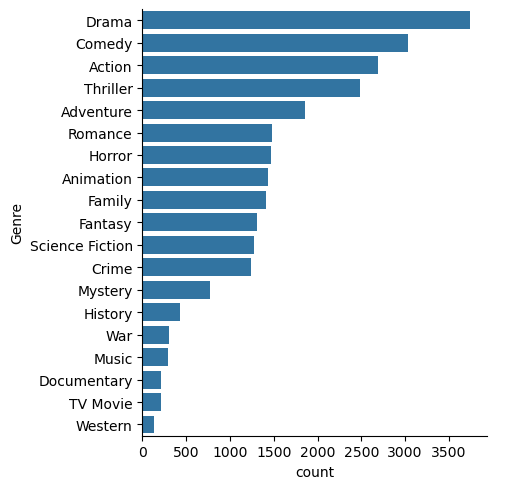

In [84]:
sns.catplot(y='Genre', data = df , kind = 'count', order=df['Genre'].value_counts().index)

## Q2: What genres has highest votes ?

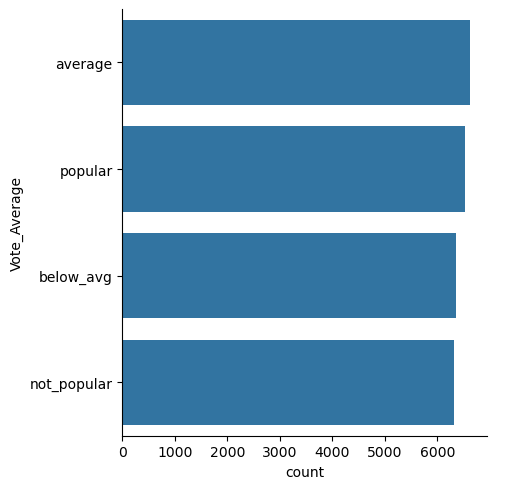

In [87]:
sns.catplot(y= 'Vote_Average' , data=df , kind='count', order = df['Vote_Average'].value_counts().index,)

## Q3: What movie got the highest popularity ? what's its genre ?

In [95]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


## Q4: What movie got the lowest popularity? what's its genre?

In [98]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


## Q5: Which year has the most filmmed movies?

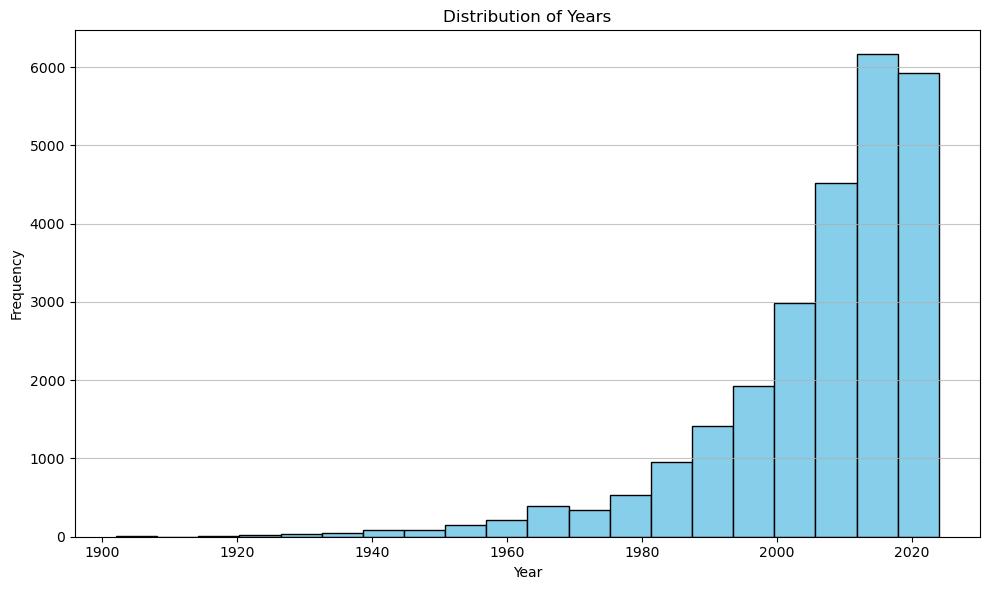

In [104]:

# Create a histogram plot for the 'Year' column
plt.figure(figsize=(10, 6))  # Set the figure size (optional)

# Option 1: Using matplotlib
plt.hist(df['Release_Date'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Option 2: Using seaborn (alternative, more stylish)
# sns.histplot(data=df, x='Year', kde=True)  # kde=True adds a density curve
# plt.title('Distribution of Years')

plt.tight_layout()  # Adjusts the plot to ensure everything fits
plt.show()

# Q1: What is the most frequent genre in the dataset?
Drama genre is the most frequent genre in our dataset and has appeared more than
14% of the times among 19 other genres.
# Q2: What genres has highest votes ?
we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the
highest popularity among fans by being having more than 18.5% of movies popularities.
# Q3: What movie got the highest popularity ? what's its genre ?
Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
genres of Action , Adventure and Sience Fiction .
# Q3: What movie got the lowest popularity ? what's its genre ?
The united states, thread' has the highest lowest rate in our dataset
and it has genres of music , drama , 'war', 'sci-fi' and history`.
# Q4: Which year has the most filmmed movies?
year 2020 has the highest filmming rate in our dataset.